# Greeks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bqrt as bq

from matplotlib import cm
# from matplotlib.ticker import LinearLocator

K = 100 # spot price
VOL = 0.20 # volatility
RF = 0.03 # risk-free

%load_ext autoreload
%autoreload 2

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## Delta

In [ ]:
S = np.linspace(0.00001,200,200)
tau = np.linspace(0.00001,1,100)
X, Y = np.meshgrid(S,tau)
Z = bq.bsm_call_delta(X,K,RF,Y,VOL)

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z, cmap='RdBu_r')
ax.azim = -60 # rotate left and right
ax.dist = 12 # zoom in and out default 10
ax.elev = 16 # look down or up
ax.set_xlabel('Spot Price($)', fontsize=12, labelpad=12)
ax.set_ylabel('Time to Maturity(yr)', fontsize=12, labelpad=12)
ax.set_zlabel('Delta($)', fontsize=12, labelpad=12)
plt.show()

## Gamma

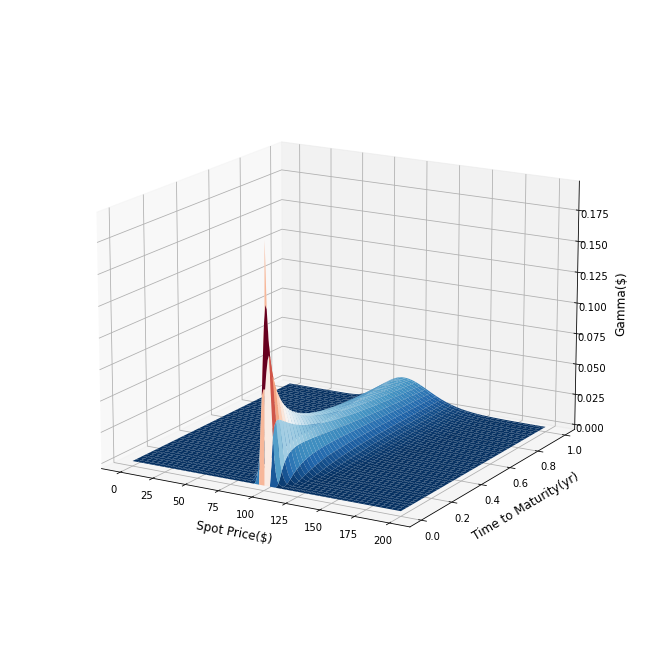

In [28]:
S = np.linspace(0.00001,200,200)
tau = np.linspace(0.00001,1,100)
X, Y = np.meshgrid(S,tau)
Z = bq.bsm_gamma(X,K,RF,Y,VOL)

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z, cmap='RdBu_r')
ax.azim = -60 # rotate left and right
ax.dist = 12 # zoom in and out default 10
ax.elev = 16 # look down or up
ax.set_xlabel('Spot Price($)', fontsize=12, labelpad=12)
ax.set_ylabel('Time to Maturity(yr)', fontsize=12, labelpad=12)
ax.set_zlabel('Gamma($)', fontsize=12, labelpad=12)
plt.show()

## Vega

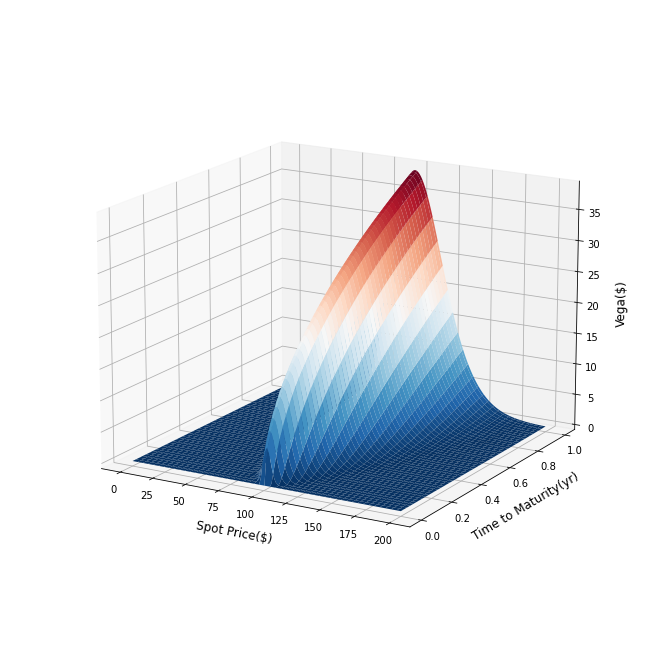

In [24]:
S = np.linspace(0.00001,200,200)
tau = np.linspace(0.00001,1,100)
X, Y = np.meshgrid(S,tau)
Z = bq.bsm_vega(X,K,RF,Y,VOL)

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z, cmap='RdBu_r')
ax.azim = -60 # rotate left and right
ax.dist = 12 # zoom in and out default 10
ax.elev = 16 # look down or up
ax.set_xlabel('Spot Price($)', fontsize=12, labelpad=12)
ax.set_ylabel('Time to Maturity(yr)', fontsize=12, labelpad=12)
ax.set_zlabel('Vega($)', fontsize=12, labelpad=12)
plt.show()

## Theta

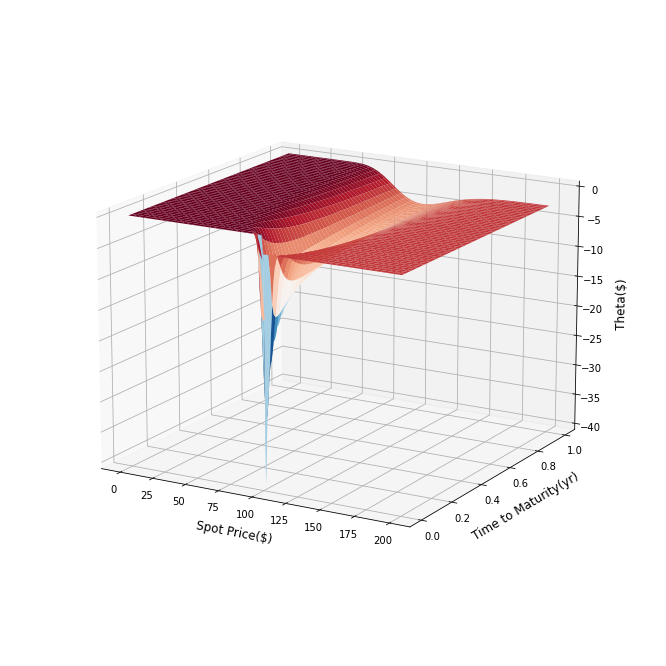

In [55]:
S = np.linspace(0.00001,200,200)
tau = np.linspace(0.00001,1,100)
X, Y = np.meshgrid(S,tau)
Z = bq.bsm_theta(X,K,RF,Y,VOL,'C')

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z, cmap='RdBu_r')
ax.azim = -60 # rotate left and right
ax.dist = 12 # zoom in and out default 10
ax.elev = 16 # look down or up
ax.set_xlabel('Spot Price($)', fontsize=12, labelpad=12)
ax.set_ylabel('Time to Maturity(yr)', fontsize=12, labelpad=12)
ax.set_zlabel('Theta($)', fontsize=12, labelpad=12)
plt.show()

## Test

In [13]:
from scipy.stats import norm

In [34]:
S = 120
K = 100
r = 0.03
tau = 1
sigma = 0.2

In [35]:
bq.bsm_price(S,K,r,tau,sigma,'C')

24.54721098367662

In [36]:
bq.bsm_price(S,K,r,tau,sigma,'P')

1.5917643385274225

In [39]:
bq.bsm_call_delta(120,100,0.03,1,0.2)

0.8773025906013396

In [38]:
bq.bsm_put_delta(120,100,0.03,1,0.2)

-0.12269740939866036

In [40]:
bq.bsm_gamma(120,100,0.03,1,0.2)

0.008466325536159855

In [42]:
bq.bsm_vega(120,100,0.03,1,0.2)*0.01

0.24383017544140384

In [46]:
d1 = (np.log(S/K) + (r+0.5*sigma**2)*tau) / (sigma*np.sqrt(tau))
d2 = d1 - sigma*np.sqrt(tau)
print(d1,d2)

1.161607783969773 0.961607783969773


In [50]:
-(120*norm.pdf(d1)*0.2)/(2*np.sqrt(1)) - 0.03*100*np.exp(-0.03)*norm.cdf(d2)

-4.860174751068563

In [51]:
-(120*norm.pdf(d1)*0.2)/(2*np.sqrt(1)) + 0.03*100*np.exp(-0.03)*norm.cdf(-d2)

-1.9488381504230383

In [45]:
-(S*norm.pdf(d1)*sigma)/(2*np.sqrt(tau)) - r*K*np.exp(-r*tau)*norm.cdf(d2)

-4.860174751068563

In [52]:
bq.bsm_theta(120,100,0.03,1,0.2,'C')/365

-0.013315547263201541

In [53]:
bq.bsm_theta(120,100,0.03,1,0.2,'P')/365

-0.005339282603898735